


#**DATA PREPARATION**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
pd.options.mode.copy_on_write = True
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('drive/MyDrive/football_datasets/laliga2425.csv')
data.drop(['Referee'], axis=1, inplace=True)

In [3]:
data['Goal difference'] = abs(data['FTHG'] - data['FTAG'])
data['Half-Time goal difference'] = abs(data['HTHG'] - data['HTAG'])
data['Total goals'] = data['FTHG'] + data['FTAG']
data['Half-Time goals'] = data['HTHG'] + data['HTAG']

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data['AwayTeam'] = data['AwayTeam'].astype('category')
data['HomeTeam'] = data['HomeTeam'].astype('category')
data['FTR'] = data['FTR'].astype('category')
data['HTR'] = data['HTR'].astype('category')
data['Month'] = data['Date'].dt.month

/tmp/ipython-input-3190859321.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
#data.isnull().sum()

In [6]:
data.rename(columns={'FTHG':'Full-Time home goals', 'FTAG':'Full-Time away goals', 'HTHG':'Half-Time home goals',
                     'HTAG':'Half-Time away goals', 'HTR':'Half-Time result', 'FTR':'Full-Time result',
                     'HS':'Home shots', 'AS':'Away shots', 'HST':'Home shots on target','AST':'Away shots on target',
                     'HC':'Home corners', 'AC':'Away corners','HY':'Home yellow cards', 'AY':'Away yellow cards',
                     'HR':'Home red cards','AR':'Away red cards', 'HF':'Home fouls', 'AF':'Away fouls'}, inplace=True)

In [7]:
data['Home points'] = np.where(data['Full-Time result']=='H', 3,
                               np.where(data['Full-Time result']=='D', 1, 0))
data['Away points'] = np.where(data['Full-Time result']=='A', 3,
                               np.where(data['Full-Time result']=='D', 1, 0))

In [8]:
home_stats = data.groupby('HomeTeam', observed=False)[['Full-Time home goals',
       'Full-Time away goals', 'Half-Time home goals',
       'Half-Time away goals', 'Home shots',
       'Away shots', 'Home shots on target', 'Away shots on target',
       'Home fouls', 'Away fouls', 'Home corners', 'Away corners',
       'Home yellow cards', 'Away yellow cards', 'Home red cards',
       'Away red cards', 'Goal difference', 'Half-Time goal difference',
       'Total goals', 'Half-Time goals', 'Home points']].mean()
away_stats = data.groupby('AwayTeam', observed=False)[['Full-Time home goals',
       'Full-Time away goals', 'Half-Time home goals',
       'Half-Time away goals', 'Home shots',
       'Away shots', 'Home shots on target', 'Away shots on target',
       'Home fouls', 'Away fouls', 'Home corners', 'Away corners',
       'Home yellow cards', 'Away yellow cards', 'Home red cards',
       'Away red cards', 'Goal difference', 'Half-Time goal difference',
       'Total goals', 'Half-Time goals', 'Away points']].mean()

In [9]:
team_stats = pd.DataFrame()
team_stats['AVG goals scored'] = (away_stats['Full-Time away goals'] + home_stats['Full-Time home goals']) / 2
team_stats['AVG goals conceded'] = (home_stats['Full-Time away goals'] + away_stats['Full-Time home goals']) / 2
team_stats['AVG shots'] = (away_stats['Away shots'] + home_stats['Home shots']) / 2
team_stats['AVG shots against'] = (home_stats['Away shots'] + away_stats['Home shots']) / 2
team_stats['AVG shots on target'] = (away_stats['Away shots on target'] + home_stats['Home shots on target']) / 2
team_stats['AVG shots on target against'] = (home_stats['Away shots on target'] + away_stats['Home shots on target']) / 2
team_stats['AVG fouls'] = (home_stats['Home fouls'] + away_stats['Away fouls']) / 2
team_stats['AVG opponents fouls'] = (home_stats['Away fouls'] + away_stats['Home fouls']) / 2
team_stats['AVG corners'] = (home_stats['Home corners'] + away_stats['Away corners']) / 2
team_stats['AVG opponents corners'] = (away_stats['Home corners'] + home_stats['Away corners']) / 2
team_stats['AVG yellow cards'] = (home_stats['Home yellow cards'] + away_stats['Away yellow cards']) / 2
team_stats['AVG opponents yellow cards'] = (away_stats['Home yellow cards'] + home_stats['Away yellow cards']) / 2
team_stats['AVG red cards'] = (home_stats['Home red cards'] + away_stats['Away red cards']) / 2
team_stats['AVG opponents red cards'] = (away_stats['Home red cards'] + home_stats['Away red cards']) / 2
team_stats['AVG total goals'] = (home_stats['Total goals']+away_stats['Total goals']) / 2
team_stats['AVG Half-Time goals'] = (home_stats['Half-Time goals']+away_stats['Half-Time goals']) / 2
team_stats['AVG points'] = (home_stats['Home points']+away_stats['Away points']) / 2
team_stats = team_stats.reset_index().rename(columns={'AwayTeam':'Team'}).set_index('Team')

# **LEAGUE OVERVIEW**

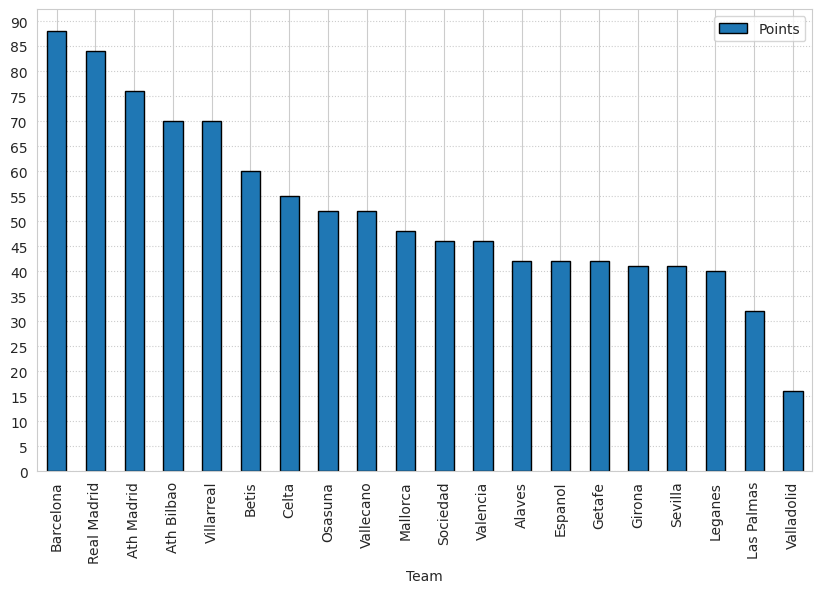

In [10]:
league_table = data.groupby('AwayTeam', observed=False)['Away points'].sum() + data.groupby('HomeTeam', observed=False)['Home points'].sum()
league_table = league_table.reset_index().rename(columns={"AwayTeam":"Team", 0:"Points"}).set_index('Team')
league_table = league_table.sort_values(by="Points", ascending=False)
league_table.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.grid(axis="y",linestyle=':')
plt.yticks([x for x in range(0, 95, 5)])
plt.show()

Barcelona won Laliga in 2024/25 season, Leganes, Las Palmas and Valladolid finished in relegation zone. The table is flattened in the bottom part. We can notice bigger points gaps from Celta and higher

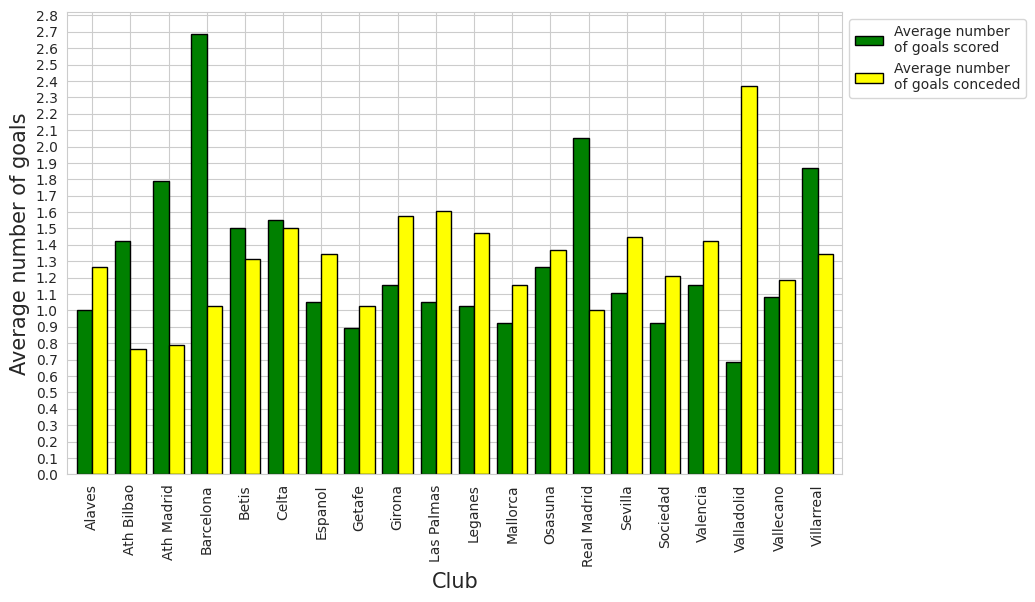

In [12]:
team_stats[['AVG goals scored', 'AVG goals conceded']].plot(kind='bar', figsize=(10,6),
                                                            edgecolor='black', color=['green','yellow'],
                                                            width=0.8)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),
           labels=['Average number\nof goals scored', 'Average number\nof goals conceded'])
plt.locator_params(axis='y', nbins=40)
plt.ylabel("Average number of goals", fontsize=15)
plt.xlabel("Club", fontsize=15)
plt.show()

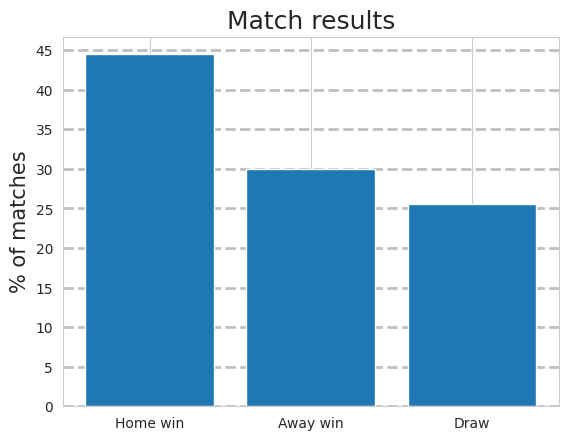

In [13]:
draw = data[data['Full-Time result']=='D']['Full-Time result'].count() / data['Full-Time result'].count() * 100
away_win = data[data['Full-Time result']=='A']['Full-Time result'].count()/ data['Full-Time result'].count() * 100
home_win = data[data['Full-Time result']=='H']['Full-Time result'].count()/ data['Full-Time result'].count() * 100
plt.bar(['Home win', 'Away win', 'Draw'], [home_win, away_win, draw])
plt.locator_params(axis='y', nbins=10)
plt.title("Match results", fontsize=18)
plt.ylabel("% of matches", fontsize=15)
plt.grid(axis='y', alpha=0.5, linestyle='--', color='grey', linewidth=2)
plt.show()

The majority of games were won by the home side.

In [14]:
data[['HomeTeam', 'AwayTeam']][((data['Half-Time result']=='H')&(data['Full-Time result']=='A') |
                               (data['Half-Time result']=='A')&(data['Full-Time result']=='H'))].groupby('AwayTeam', observed=False).size()

,0
AwayTeam,
Alaves,2
Ath Bilbao,1
Ath Madrid,1
Barcelona,3
Betis,3
Celta,2
Espanol,0
Getafe,1
Girona,0


In this data series we can see how many times each club managed to change half-time result and win the game eventually




# CORRELATION BETWEEN SHOTS AND GOALS ANALYSIS

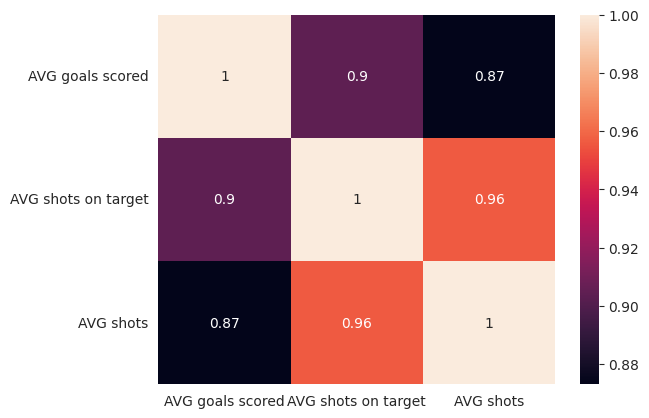

In [15]:
cor = team_stats[['AVG goals scored', 'AVG shots on target', 'AVG shots']].corr()
sns.heatmap(cor, annot=True)
plt.show()

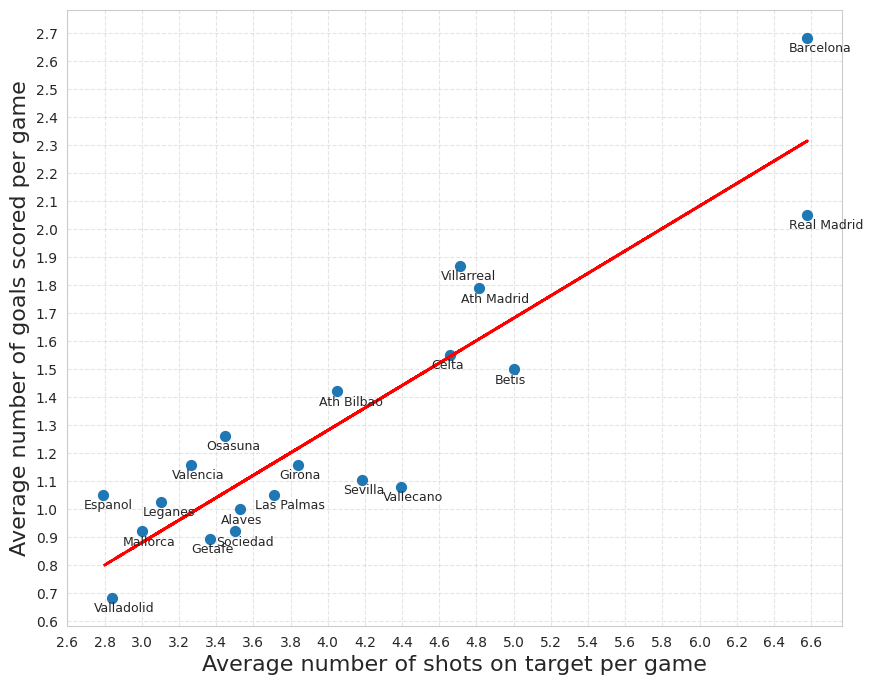

In [16]:
x = team_stats['AVG shots on target']
y = team_stats['AVG goals scored']
plt.figure(figsize=(10,8))
plt.scatter(x, y, s=50)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=2)
teams = team_stats.index
for i, team in enumerate(teams):
    plt.text(x.iloc[i]-0.1, y.iloc[i]-0.05, team, fontsize=9)
plt.locator_params(axis='y', nbins=40)
plt.locator_params(axis='x', nbins=40)
plt.xlabel("Average number of shots on target per game", fontsize=16)
plt.ylabel("Average number of goals scored per game", fontsize=16)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

From this plot I can say that there is a strong correlation between shots on  target and goals scored. The higher number of shots on target the higher number of goals. Trendline shows that teams above it were more effective than the league average. Teams below the line was less effective than the league average

# OFFENSIVE AND DEFENSIVE STATS ANALYSIS

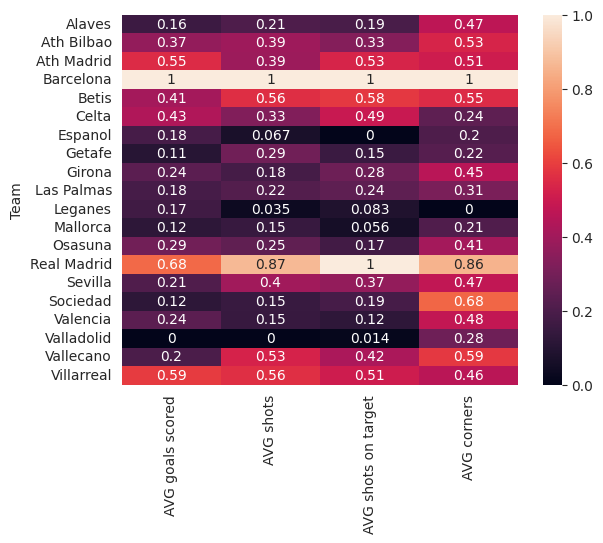

In [17]:
stats = team_stats[['AVG goals scored', 'AVG shots',
                    'AVG shots on target', 'AVG corners']]

scaler = MinMaxScaler()
stats_scaled = pd.DataFrame(scaler.fit_transform(stats),
                            index=stats.index,
                            columns=stats.columns)

sns.heatmap(stats_scaled, annot=True)
plt.show()

The conclusion from this image is that Barcelona was the best team offensivly in the 2024/25 LaLiga season, 2nd best was Real Madrid and then there is a huge gap in offensive statistics especially average shots on target, on the other side we can see clubs like Valladolid, Leganes, Mallorca and Espanyol. Their offensive numbers are the worst in league.

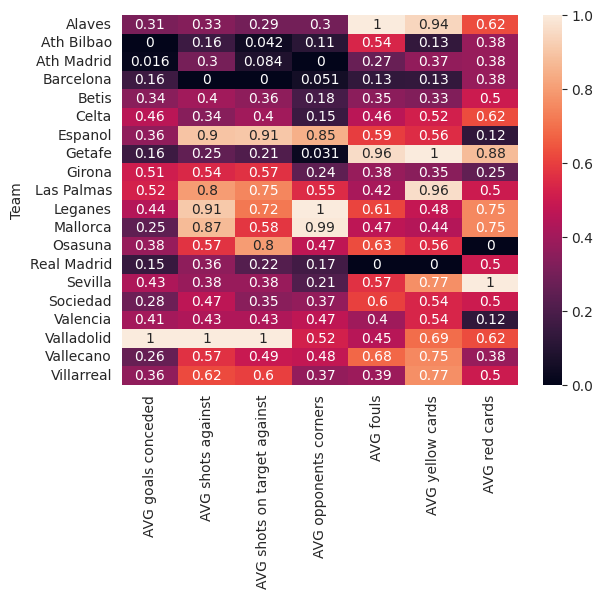

In [18]:
stats = team_stats[['AVG goals conceded', 'AVG shots against',
                    'AVG shots on target against', 'AVG opponents corners',
                    'AVG fouls', 'AVG yellow cards', 'AVG red cards']]

scaler = MinMaxScaler()
stats_scaled = pd.DataFrame(scaler.fit_transform(stats),
                            index=stats.index,
                            columns=stats.columns)

sns.heatmap(stats_scaled, annot=True)
plt.show()

On this image we can see defensive stats. The worst team regarding goals and shots conceded was Valladolid. Analyzing aggressivness, the most aggressive team was Getafe and Alaves. The best teams defensively in terms of goals and hots conceded were Barcelona, Atletico Madrid and Athletic Bilbao

# **HOME FIELD advantage ANALYSIS**

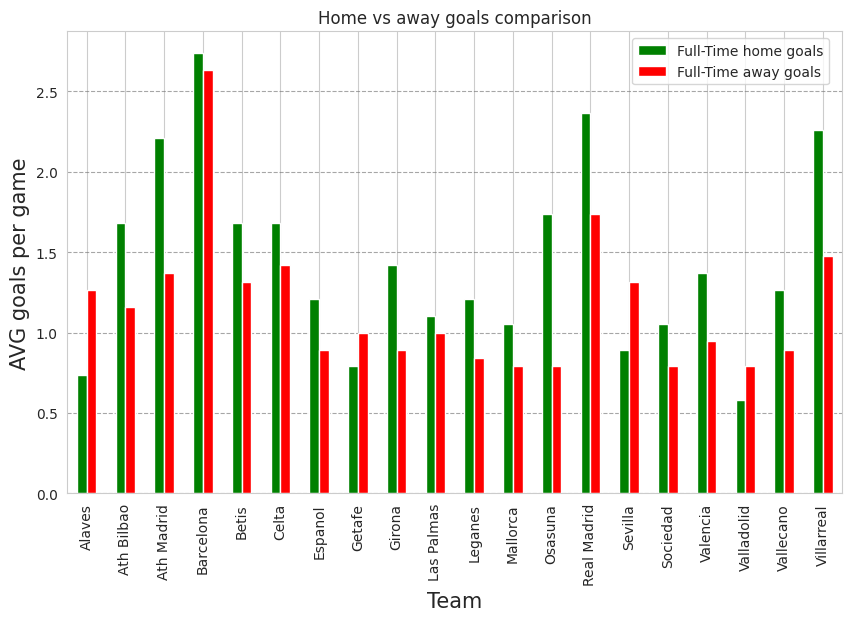

In [19]:
goals_comparison = pd.concat([home_stats['Full-Time home goals'],
                              away_stats['Full-Time away goals']], axis=1)
goals_comparison.plot(kind='bar', color=['green', 'red'],
                      figsize=(10,6))
plt.grid(axis='y', alpha=0.7, linestyle='--', color='gray')
plt.title('Home vs away goals comparison')
plt.ylabel('AVG goals per game', fontsize=15)
plt.xlabel('Team', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(0.72,1))
plt.show()

Majority of clubs scored more goals as a host

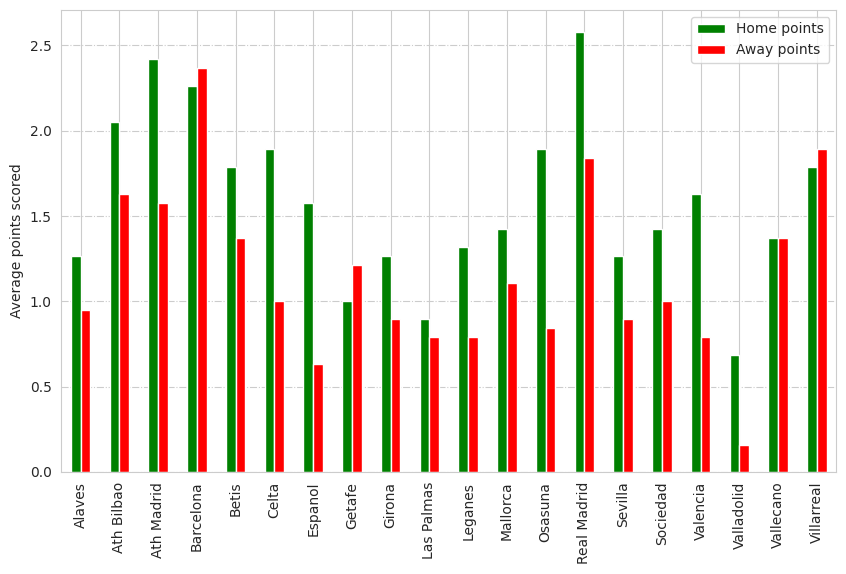

In [20]:
points_comparison = pd.concat([home_stats['Home points'],
                               away_stats['Away points']], axis=1)
points_comparison.plot(kind='bar', color=['green', 'red'], figsize=(10,6))
plt.grid(linestyle='-.', axis='y')
plt.ylabel('Average points scored')
plt.show()

Here we have comaprison of points scored between home and away games. The best team in home was Real Madrid, the best team in away matches was FC Barcelona. Majority of teams scored more points in home games, but there was teams which did the opposite like FC Barcelona, Geatfe and Villarreal. Only Vallecano had same amount of points scored in home and away matches.



In [22]:
results_home = data.groupby(['HomeTeam', 'Full-Time result'], observed=False)['Full-Time result'].count().unstack()
results_home.rename({'A':'Lose', 'D':'Draw', 'H':'Win'}, axis=1, inplace=True)

results_away = data.groupby(['AwayTeam', 'Full-Time result'], observed=False)['Full-Time result'].count().unstack()
results_away.rename({'H':'Lose', 'D':'Draw', 'A':'Win'}, axis=1, inplace=True)

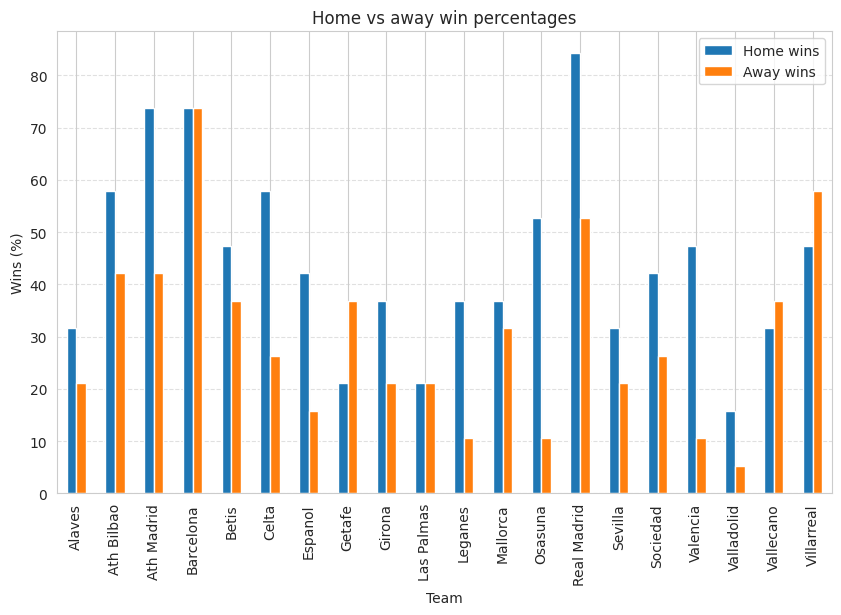

In [23]:
win_percentage_home = results_home['Win'] / (results_home['Draw'] + results_home['Lose'] + results_home['Win']) *100
win_percentage_away = results_away['Win'] / (results_away['Draw'] + results_away['Lose'] + results_away['Win'])*100
win_percentage = pd.concat([win_percentage_home, win_percentage_away], axis=1)
win_percentage.plot(kind='bar', figsize=(10,6))
plt.legend(labels=['Home wins', 'Away wins'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Home vs away win percentages')
plt.ylabel('Wins (%)')
plt.xlabel('Team')
plt.show()

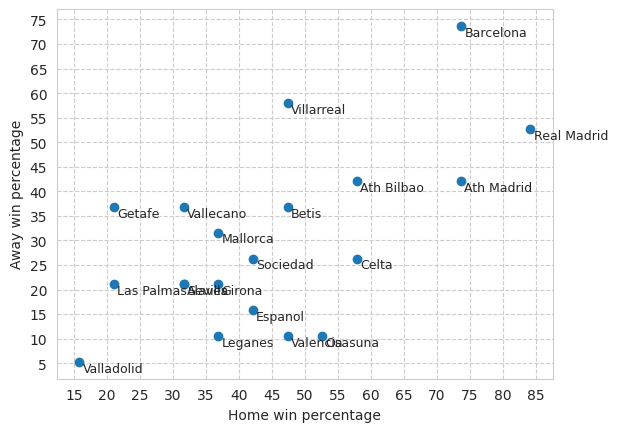

In [24]:
plt.scatter(win_percentage[0], win_percentage[1])
teams= win_percentage.index
for i, team in enumerate(teams):
  plt.text(win_percentage[0].iloc[i]+0.5, win_percentage[1].iloc[i]-2, team, fontsize=9)
plt.grid(True, linestyle='--')
plt.locator_params(nbins=30)
plt.xlabel('Home win percentage')
plt.ylabel('Away win percentage')
plt.show()

We can assume that there is no great correlation between home and away win percentage. Some clubs did similairly in both kind of games but there are also some clubs that had big differencee between this two percentages.

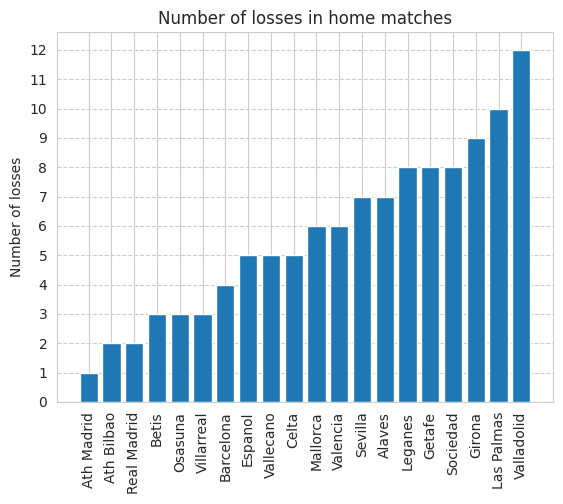

In [25]:
home_loses = results_home['Lose'].sort_values()
plt.bar(home_loses.index, home_loses)
plt.xticks(rotation=90)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linestyle='--')
plt.title("Number of losses in home matches")
plt.ylabel("Number of losses")
plt.show()

# BARCELONA AND REAL FORM ANALYSIS

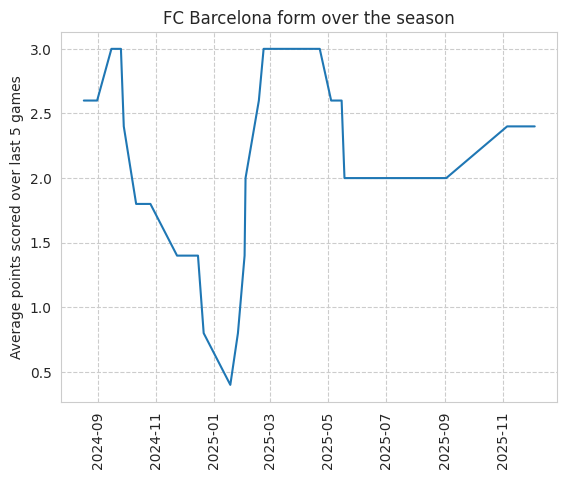

In [26]:
data_barca = data[(data['HomeTeam']=='Barcelona') | (data['AwayTeam']=='Barcelona')].sort_values('Date')
data_barca['Form'] = (data_barca.apply(lambda row: row['Home points'] if row['HomeTeam'] == 'Barcelona' else
                                       row['Away points'],axis=1).rolling(5).mean())

plt.plot(data_barca['Date'], data_barca['Form'])
plt.xticks(rotation=90)
plt.grid(linestyle='--')
plt.title("FC Barcelona form over the season")
plt.ylabel("Average points scored over last 5 games")
plt.show()

FC Barcelona had a big decline in form in the 2nd quarter of the season.

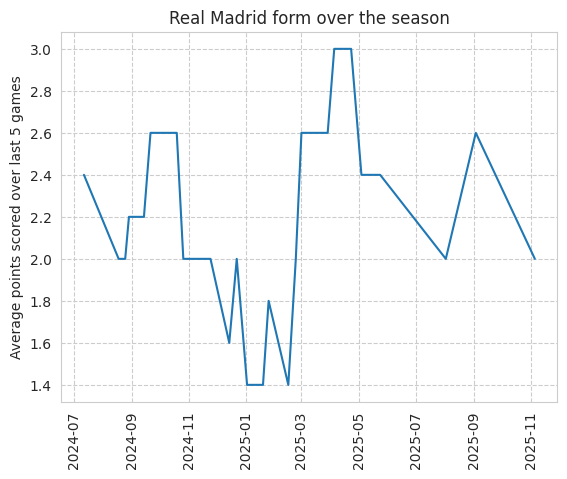

In [27]:
data_real = data[(data['HomeTeam']=='Real Madrid') | (data['AwayTeam']=='Real Madrid')].sort_values('Date')
data_real['Form'] = (data_real.apply(lambda row: row['Home points'] if row['HomeTeam'] == 'Real Madrid' else
                                       row['Away points'],axis=1).rolling(5).mean())

plt.plot(data_real['Date'], data_real['Form'])
plt.xticks(rotation=90)
plt.grid(linestyle='--')
plt.title("Real Madrid form over the season")
plt.ylabel("Average points scored over last 5 games")
plt.show()

Real had also had a decline in form at the turn of 2024 and 2025